# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
y = y.reshape(len(y), 1) # to put y as an array not a vector cos it requires 2D array

In [4]:
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [6]:
print(x)
print(_*9)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR model on the whole dataset

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel= "rbf")
regressor.fit(x, y)

C:\Users\Mercy Okonna\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

# Predicting a results

In [8]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

# Visualizing the SVR results

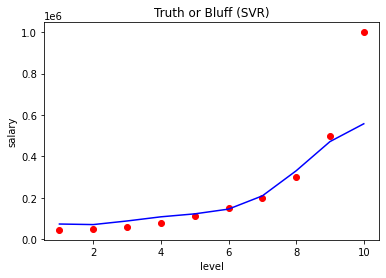

In [13]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = "red")
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color = "blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("level")
plt.ylabel("salary")
plt.show()

# Visualizing the SVR results (for higher resolution and smoother curve)

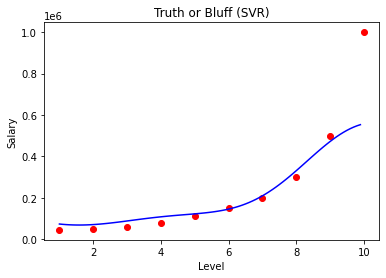

In [14]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = "red")
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color= "blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()